Run the notebook and observe the latent inhibition effect in the final plot

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Use classes to hold CS/US variables

In [19]:
#define CS and initial parameters
class CS():
    def __init__(self,alpha):
        self.alpha=alpha
        self.alpha_total=alpha
        self.alpha_hist=[alpha]
        self.Vnet=0
        self.Vhist=[0]

In [20]:
#define CS and initial parameters
class US():
    def __init__(self, beta_e, beta_i, asymtote):
      
        self.beta_e=beta_e
        self.beta_i=beta_i
        self.asymtote=asymtote

Instantiate variables for the latent inhibition simulation

In [21]:
a=CS(0.7)
b=CS(0.7)
γ =  0.1 # is a free parameter that determines how much α is influenced by events on the immediately preceding trial
us_plus=US(0.05, 0.04, 1)
us_minus=US(0.05, 0.04, 1)

Pearce-Hall Update Function (Phase 1)

In [22]:
def ph(n_trials, CS, US):

    for trial in range(n_trials):
        CS.alpha_total=(1-γ)*CS.alpha_total
        CS.alpha_hist.append(CS.alpha_total)                                     
        
    return CS.alpha_hist

Run the LI group

In [23]:
alpha_hist=ph(50, a, us_minus)

Run the control group in phase 1

In [24]:
ctrl_hist1=ph(50, b, us_minus)

Plot the change in alpha in the two groups (it is identical because a and b have identical starting values)

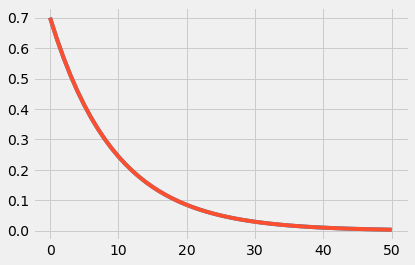

In [25]:
plt.plot(alpha_hist)
plt.plot(ctrl_hist1)


Define phase 2 Pearce_Hall Function

In [26]:
def ph_phase2(n_trials, CS, US):
    
    CS.Vnet+=CS.alpha_total*US.beta_e*(1-CS.alpha_total*US.beta_i)
    CS.Vhist.append(CS.Vnet)
    CS.alpha_total=γ*abs(US.asymtote-CS.Vnet)+(1-γ)*CS.alpha_total
    CS.alpha_hist=[CS.alpha_total]

    for trial in range(n_trials-1):#results are appended to initial values which are instantiated based on phase 1 values
        CS.alpha_total=γ*abs(US.asymtote-CS.Vnet)+(1-γ)*CS.alpha_total
        CS.Vnet+=CS.alpha_total*US.beta_e*(1-CS.alpha_total*US.beta_i)
        CS.Vhist.append(CS.Vnet)
        CS.alpha_hist.append(CS.alpha_total)                                     
        
    return CS.alpha_hist, CS.Vhist

Run phase two on the LI group

In [27]:
alpha_hist2, Vnet=ph_phase2(50, a, us_plus)

Reinstantiate  CS A so the control group can be run

In [28]:
a=CS(0.7)

In [29]:
alpha_hist_control, Vnet_control=ph_phase2(50, a, us_plus)

Plot the alpha histories of the LI and control groups

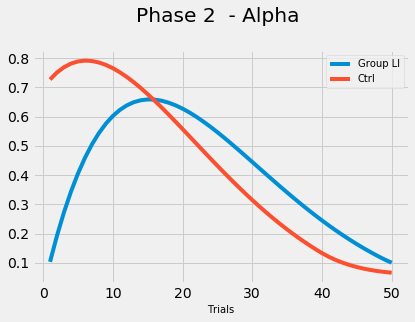

In [30]:
alpha_hist2.insert(0,None)
alpha_hist_control.insert(0,None)
plt.style.use('fivethirtyeight')
plt.title('Phase 2  - Alpha \n')
plt.plot(alpha_hist2, label='Group LI')
plt.plot(alpha_hist_control, label='Ctrl')
plt.xlabel('Trials', size=10)
plt.legend(prop={'size': 10})

Plot the associative strength histories of the LI and control groups

Text(0.5, 0, 'Trials')

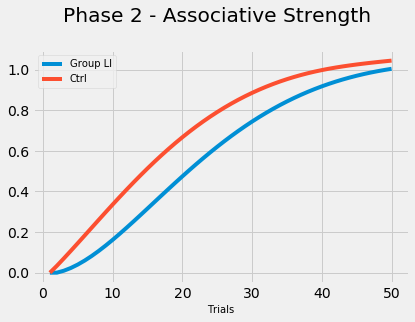

In [31]:
Vnet.insert(0,None)
Vnet_control.insert(0,None)
Vnet=Vnet[:-1]
Vnet_control=Vnet_control[:-1]
plt.title('Phase 2 - Associative Strength \n')
plt.plot(Vnet, label='Group LI')
plt.plot(Vnet_control, label='Ctrl')
plt.legend(prop={'size': 10})
plt.xlabel('Trials', size=10)

The plots clearly demonstrate the latent inhibition effect - observe the gap between group LI and the Ctil (though this diminishes over trials)